In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [6]:
dataset_path = "/kaggle/input/fer2013plus/fer2013plus/fer2013"  


In [7]:
train_dir = "/kaggle/input/fer2013plus/fer2013plus/fer2013/train"
test_dir = "/kaggle/input/fer2013plus/fer2013plus/fer2013/test"


In [8]:
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print("Class labels:", train_generator.class_indices)


Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.
Class labels: {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happiness': 4, 'neutral': 5, 'sadness': 6, 'surprise': 7}


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/kaggle/working/emotion_model.keras", monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


888/888 ━━━━━━━━━━━━━━━━━━━━ 475s 519ms/step - accuracy: 0.3525 - loss: 1.6258 - val_accuracy: 0.3661 - val_loss: 1.5947
Epoch 2/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 299s 335ms/step - accuracy: 0.3652 - loss: 1.5865 - val_accuracy: 0.3924 - val_loss: 1.5601
Epoch 3/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 299s 334ms/step - accuracy: 0.3801 - loss: 1.5631 - val_accuracy: 0.3829 - val_loss: 1.5546
Epoch 4/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 305s 341ms/step - accuracy: 0.3861 - loss: 1.5408 - val_accuracy: 0.4067 - val_loss: 1.5362
Epoch 5/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 291s 325ms/step - accuracy: 0.3901 - loss: 1.5367 - val_accuracy: 0.4133 - val_loss: 1.5172
Epoch 6/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 289s 323ms/step - accuracy: 0.3966 - loss: 1.5307 - val_accuracy: 0.3478 - val_loss: 1.5396
Epoch 7/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 288s 321ms/step - accuracy: 0.4075 - loss: 1.5078 - val_accuracy: 0.4241 - val_loss: 1.4992
Epoch 8/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 290s 324ms/step - accuracy: 0.4108 - loss: 1.51

In [11]:
loss, accuracy = model.evaluate(val_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.4163 - loss: 1.6458
Test Accuracy: 49.13%


In [12]:
# Save in the new .keras format (recommended)
model.save("/kaggle/working/emotion_model_resnet50.keras")



In [13]:
model.save("/kaggle/working/emotion_model_resnet50.h5", save_format="h5")


In [14]:
import os

os.listdir("/kaggle/working")


['emotion_model.keras',
 'emotion_model_resnet50.h5',
 '.virtual_documents',
 'emotion_model_resnet50.keras']

In [15]:
from IPython.display import FileLink

# For .keras format
FileLink("/kaggle/working/emotion_model_resnet50.keras")

# Or for .h5 (only if you saved in h5 format)
# FileLink("/kaggle/working/emotion_model.h5")


/kaggle/working/emotion_model_resnet50.keras

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Your emotion labels (based on your dataset folder names)
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Load and preprocess the uploaded image
img_path = '/kaggle/input/testing-image-ds/img1.jpg'  #  image name
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale the image like during training
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch of images

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_index = np.argmax(prediction)
predicted_label = class_labels[predicted_index]

# Show the image and prediction result
plt.imshow(img)
plt.title(f"Predicted Emotion: {predicted_label}")
plt.axis('off')  # Hide axes for better visualization
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


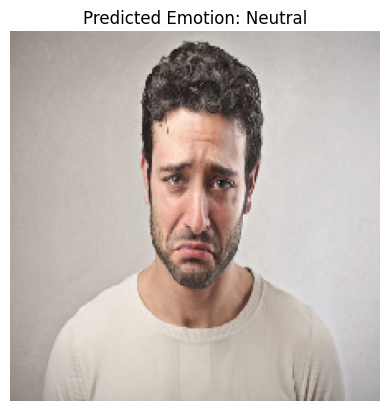

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Your emotion labels (based on your dataset folder names)
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Load and preprocess the uploaded image
img_path = '/kaggle/input/testing-image-ds/img2.jpg'  #  image name
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale the image like during training
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch of images

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_index = np.argmax(prediction)
predicted_label = class_labels[predicted_index]

# Show the image and prediction result
plt.imshow(img)
plt.title(f"Predicted Emotion: {predicted_label}")
plt.axis('off')  # Hide axes for better visualization
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


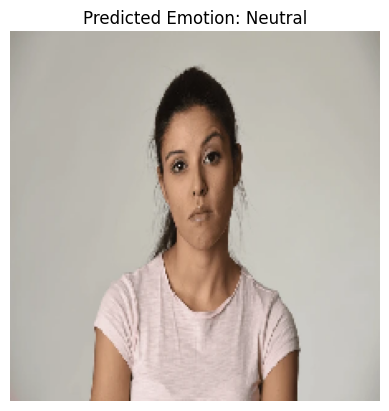

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Your emotion labels (based on your dataset folder names)
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Load and preprocess the uploaded image
img_path = '/kaggle/input/testing-image-ds/img3.webp'  #  image name
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale the image like during training
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch of images

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_index = np.argmax(prediction)
predicted_label = class_labels[predicted_index]

# Show the image and prediction result
plt.imshow(img)
plt.title(f"Predicted Emotion: {predicted_label}")
plt.axis('off')  # Hide axes for better visualization
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


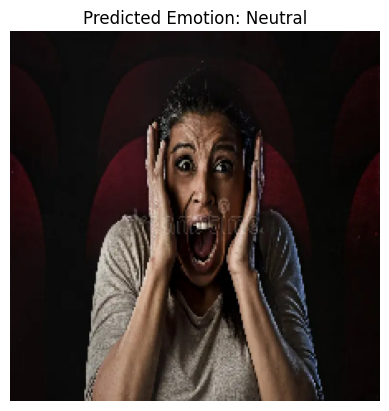

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Your emotion labels (based on your dataset folder names)
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Load and preprocess the uploaded image
img_path = '/kaggle/input/123456798/img5.webp'  #  image name
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale the image like during training
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch of images

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_index = np.argmax(prediction)
predicted_label = class_labels[predicted_index]

# Show the image and prediction result
plt.imshow(img)
plt.title(f"Predicted Emotion: {predicted_label}")
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [20]:
import os
os.listdir('/kaggle/working')


['emotion_model.keras',
 'emotion_model_resnet50.h5',
 '.virtual_documents',
 'emotion_model_resnet50.keras']

In [21]:
model.save('/kaggle/working/emotion_model_resnet50.keras')
